In [7]:
import os
new_directory = "/Users/huaxingzeng/Desktop/DATA 1030/DATA1030_Project"

# Change the current working directory
os.chdir(new_directory)

In [8]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt

# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split 

In [9]:
# load data from a csv file
df_raw = pd.read_csv('StudentPerformanceFactors.csv')

print(df_raw.head(3))

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive        

In [10]:
print(df_raw.shape[0]) # number of rows
print(df_raw.shape[1]) # number of columns

6607
20


In [11]:
print(df_raw.dtypes) 

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [37]:
print(df_raw['Exam_Score'].describe())

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


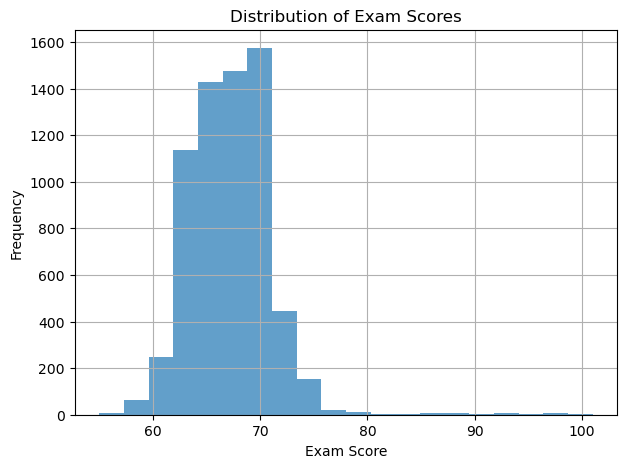

In [32]:
plt.figure(figsize=(7, 5))
plt.hist(df_raw['Exam_Score'], bins=20, alpha=0.7)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.grid(True)
plt.show()

In [11]:
above_80 = df_raw[df_raw['Exam_Score'] >= 73].shape[0]
below_80 = df_raw[df_raw['Exam_Score'] < 73].shape[0]

print(f"Number of students who scored above 73: {above_80}")
print(f"Number of students who scored 73 or below: {below_80}")

Number of students who scored above 73: 371
Number of students who scored 73 or below: 6236


EDA GRAPHS

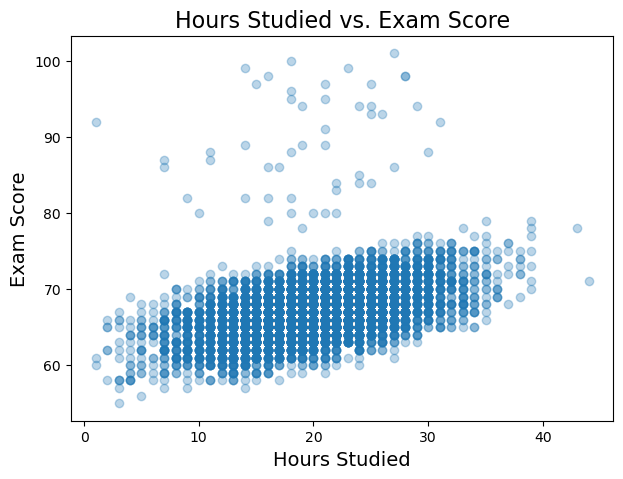

In [38]:

plt.figure(figsize=(7, 5))
plt.scatter(df_raw['Hours_Studied'], df_raw['Exam_Score'], alpha=0.3)

# Adding labels and title
plt.title('Hours Studied vs. Exam Score', fontsize=16)
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

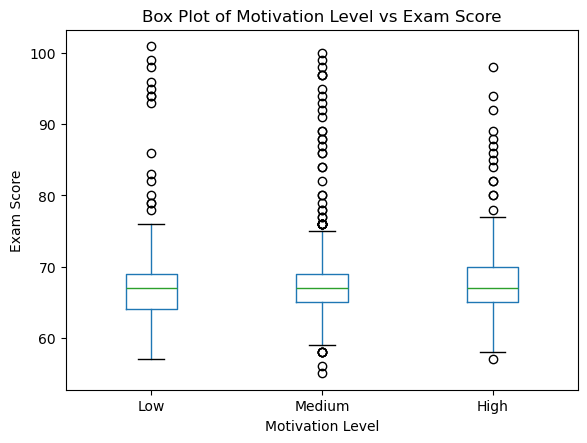

In [25]:
# Ensure Motivation_Level is ordered as 'Low', 'Medium', 'High'
df_raw['Motivation_Level'] = pd.Categorical(df_raw['Motivation_Level'], categories=['Low', 'Medium', 'High'], ordered=True)

plt.figure(figsize=(10, 6))

# Plot Motivation_Level vs Exam_Score
df_raw.boxplot(column='Exam_Score', by='Motivation_Level', grid=False)

# Set plot labels and title
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.title('Box Plot of Motivation Level vs Exam Score')
plt.suptitle('')  # Suppress the automatic suptitle generated by pandas

# Show the plot
plt.show()


<Figure size 1100x700 with 0 Axes>

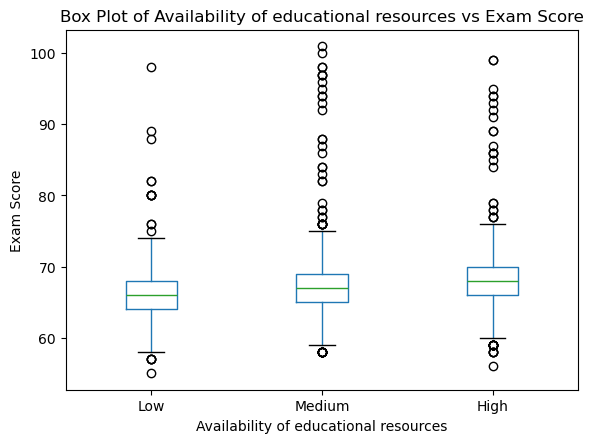

In [31]:
# Ensure Teacher_Quality is ordered as 'Low', 'Medium', 'High'
df_raw['Access_to_Resources'] = pd.Categorical(df_raw['Access_to_Resources'], categories=['Low', 'Medium', 'High'], ordered=True)

plt.figure(figsize=(11, 7))

# Plot Teacher_Quality vs Exam_Score
df_raw.boxplot(column='Exam_Score', by='Access_to_Resources', grid=False)

# Set plot labels and title
plt.xlabel('Availability of educational resources')
plt.ylabel('Exam Score')
plt.title('Box Plot of Availability of educational resources vs Exam Score')
plt.suptitle('')  # Suppress the automatic suptitle generated by pandas

# Show the plot
plt.show()

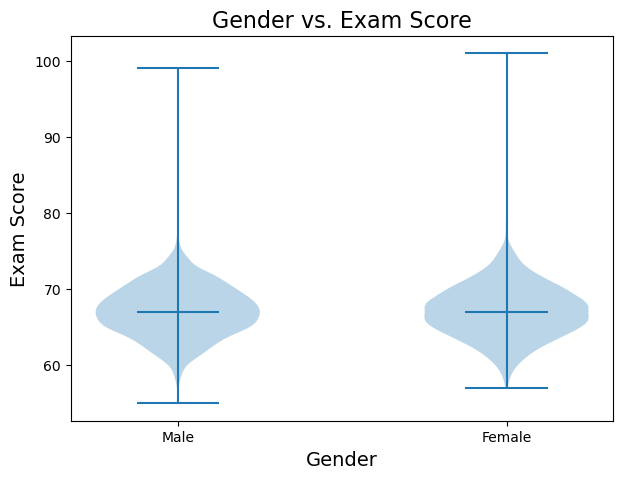

In [40]:

# Prepare the data for plotting (split by gender)
genders = df_raw['Gender'].unique()  # Get unique gender categories
data = [df_raw[df_raw['Gender'] == gender]['Exam_Score'] for gender in genders]  # Group data by gender

# Create the violin plot using only matplotlib
plt.figure(figsize=(7, 5))
plt.violinplot(data,showmedians=True)

# Add x-ticks and labels
plt.xticks([1, 2], genders)

# Adding labels and title
plt.title('Gender vs. Exam Score', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)

# Display the plot
plt.show()


DROP NAs?

In [41]:
# # drop the missing values:
# print(df_raw.shape)
# # by default, rows/points are dropped
# df = df_raw.dropna()
# print(df.shape)

(6607, 20)
(6378, 20)


In [ ]:
# # ordinal imputation (not used)

# ordinal_ftrs = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 
#                 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']

# imputer = SimpleImputer(strategy='most_frequent')

# df_raw[ordinal_ftrs] = imputer.fit_transform(df_raw[ordinal_ftrs])

# print(df_raw.isnull().sum())  # To check if missing values are filled


SPLITTING

In [12]:
# Separate the feature matrix X and the target variable y
X = df_raw.drop(columns=['Exam_Score'])  # All columns except 'Exam_Score'
y = df_raw['Exam_Score']  # The target variable is 'Exam_Score'

# Now X contains the features and y contains the target
print('Feature matrix X:', X.shape)
print('Target variable y:', y.shape)

# Show first few rows of X and y to verify
print(X.head(3))
print(y.head(3))


Feature matrix X: (6607, 19)
Target variable y: (6607,)
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   

  School_Type Peer_Influence  Physical_Activity Learn

In [ ]:
# stratified split based on the condition that students score above or below 73

random_state = 42
stratify_col = (df_raw['Exam_Score'] >= 73).astype(int)  # 1 if above 75, else 0

X_train, X_other, y_train, y_other = train_test_split(X, y,\
                                                      train_size=0.6, random_state=random_state, stratify=stratify_col)
print('training set:', X_train.shape, y_train.shape)  # 60% of points are in train

X_val, X_test, y_val, y_test = train_test_split(X_other, y_other,train_size=0.5,\
                                                random_state=random_state, stratify=(stratify_col.loc[X_other.index]))

print('validation set:', X_val.shape, y_val.shape)  # 20% of points are in validation
print('test set:', X_test.shape, y_test.shape)  # 20% of points are in test

print(X_train.head())


PREPROCESSING

In [ ]:
# new version with NAs as a new catagory

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Replace blank cells with 'NA' in specific ordinal features
ordinal_ftrs = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 
                'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']

X_train[ordinal_ftrs] = X_train[ordinal_ftrs].fillna('NA')
X_val[ordinal_ftrs] = X_val[ordinal_ftrs].fillna('NA')
X_test[ordinal_ftrs] = X_test[ordinal_ftrs].fillna('NA')

# Update ordinal categories to include 'NA' where appropriate
ordinal_cats = [['Low', 'Medium', 'High'],  # Parental_Involvement
                ['Low', 'Medium', 'High'],  # Access_to_Resources
                ['Low', 'Medium', 'High'],  # Motivation_Level
                ['Low', 'Medium', 'High'],  # Family_Income
                ['NA', 'Low', 'Medium', 'High'],  # Teacher_Quality
                ['Negative', 'Neutral', 'Positive'],  # Peer_Influence
                ['NA', 'High School', 'College', 'Postgraduate'],  # Parental_Education_Level
                ['NA', 'Near', 'Moderate', 'Far']]  # Distance_from_Home

onehot_ftrs = ['Gender', 'Extracurricular_Activities', 'Internet_Access',
               'School_Type', 'Learning_Disabilities']

std_ftrs = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
            'Physical_Activity','Tutoring_Sessions']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=ordinal_cats, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])  # For now we only preprocess

# Apply preprocessing to the datasets
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(3964, 19)
(3964, 24)
[[ 1.          1.          0.         ... -0.76716078  0.98471659
  -1.23507788]
 [ 0.          0.          1.         ...  0.89744426  0.01900245
  -0.42289329]
 [ 1.          1.          2.         ... -1.25267058  0.01900245
   0.3892913 ]
 ...
 [ 1.          2.          0.         ...  1.66038823  0.98471659
  -0.42289329]
 [ 2.          1.          1.         ...  0.75872717  0.98471659
  -1.23507788]
 [ 2.          2.          1.         ... -0.90587787 -0.94671169
  -0.42289329]]
